In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('res.pkl', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res.pkl', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,ChestWall,MaxDvh,AtMost,3000,9.33
1,D2CM,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,20.19
3,Lung_Total-GTV,MaxDvh,AtMost,1160,85.52
4,Lung_Total-GTV,MaxDvh,AtMost,1240,57.01
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Ribs,MaxDvh,AtMost,3200,1.51
8,Ribs,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,3.25


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,PTV,MinDose,4800.0,0.0,NaN,500
1,PTV,MaxDose,6000.0,0.0,NaN,50
2,max 3600,MaxDose,3600.0,0.0,NaN,1
3,max 1680,MaxDose,1680.0,0.0,NaN,1
4,External,"Dose Fall-Off [H]4800 cGy [L]2400 cGy, Low dos...",NaN,NaN,NaN,1
5,Ribs,MaxDose,3800.0,0.0,NaN,50
6,D2CM,MaxDose,2250.0,0.0,NaN,50


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,ChestWall,MaxDvh,3000.0,1929.530216,-35.682326
1,D2CM,MaxDose,2400.0,2321.516357,-3.270152
2,Esophagus,MaxDvh,1880.0,236.059745,-87.443631
3,Lung_Total-GTV,MaxDvh,1160.0,12.869589,-98.890553
4,Lung_Total-GTV,MaxDvh,1240.0,68.784915,-94.452829
5,PTV,MinDvh,4800.0,4799.999853,-0.000003
6,PTV,MaxDose,8000.0,5897.977051,-26.275287
7,Ribs,MaxDvh,3200.0,3120.144812,-2.495475
8,Ribs,MaxDose,4000.0,4331.385254,8.284631
9,SpinalCanal,MaxDvh,1360.0,643.945221,-52.651087


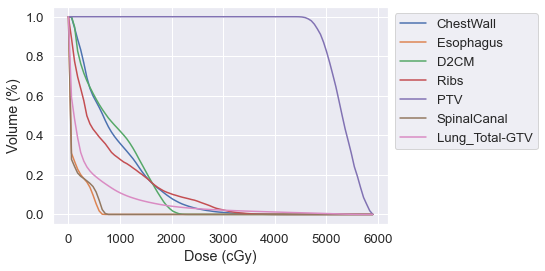

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 463.26, Linear-Quadratic: 394.62
